In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from highlight_text import ax_text, fig_text

In [2]:
path = r'C:\Users\dqthi\OneDrive\Github\data_learning_journey\Projects\FinancialStatementAnalysis\NFLX_Netflix\Netflix_NFLX_income_annual.csv'

df = pd.read_csv(path)

In [3]:
df

,date,symbol,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,revenue,costOfRevenue,...,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil,link,finalLink
0,2024-12-31,NFLX,USD,1065280,2025-01-27,2025-01-27 16:01:56,2024,FY,39000966000,21038464000,...,0.255523,1254026000,8711631000,0.223370,20.28,19.83,429519000,439261000,https://www.sec.gov/Archives/edgar/data/106528...,https://www.sec.gov/Archives/edgar/data/106528...
1,2023-12-31,NFLX,USD,1065280,2024-01-26,2024-01-26 16:01:56,2023,FY,33723297000,19715368000,...,0.184009,797415000,5407990000,0.160364,12.25,12.03,441571000,449498000,https://www.sec.gov/Archives/edgar/data/106528...,https://www.sec.gov/Archives/edgar/data/106528...
2,2022-12-31,NFLX,USD,1065280,2023-01-26,2023-01-26 16:03:50,2022,FY,31615550000,19168285000,...,0.166498,772005000,4491924000,0.142080,10.10,9.95,444698000,451290000,https://www.sec.gov/Archives/edgar/data/106528...,https://www.sec.gov/Archives/edgar/data/106528...
3,2021-12-31,NFLX,USD,1065280,2022-01-27,2022-01-27 17:03:33,2021,FY,29697844000,17332683000,...,0.196651,723875000,5116228000,0.172276,11.55,11.24,443155000,455372000,https://www.sec.gov/Archives/edgar/data/106528...,https://www.sec.gov/Archives/edgar/data/106528...
4,2020-12-31,NFLX,USD,1065280,2021-01-28,2021-01-28 16:21:59,2020,FY,24996056000,15276319000,...,0.127994,437954000,2761395000,0.110473,6.26,6.08,440922000,454208000,https://www.sec.gov/Archives/edgar/data/106528...,https://www.sec.gov/Archives/edgar/data/106528...


In [4]:
def coerce_ratios_wide(df_like):
    df = df_like.copy()

    # Put year on the index no matter the input shape
    if "calendarYear" in df.columns:
        df = df.set_index("calendarYear")

    # Keep only *ratio* columns
    ratio_cols = [c for c in df.columns if "ratio" in c.lower()]
    df = df[ratio_cols]

    # Year index: numeric, sorted
    df.index = pd.to_numeric(df.index, errors="coerce")
    df = df.loc[df.index.notna()].sort_index()

    # Values → floats in [0, 1]; handle "42%", "0.42", commas, stray text
    for c in df.columns:
        s = df[c].astype(str).str.replace(",", "", regex=False).str.strip()
        pct = s.str.endswith("%")
        s = s.str.rstrip("%")
        vals = pd.to_numeric(s, errors="coerce")
        vals = np.where(pct, vals / 100.0, vals)
        df[c] = vals.astype(float)

    df = df.rename(columns={
    "grossProfitRatio": "Gross Profit Margin",
    "ebitdaratio": "EBITDA Margin",
    "operatingIncomeRatio": "Operating Margin",
    "incomeBeforeTaxRatio": "Pre-Tax Margin",
    "netIncomeRatio": "Net Income Margin"})

    return df

In [5]:
df_ratio = coerce_ratios_wide(df)

In [6]:
df_ratio

,Gross Profit Margin,EBITDA Margin,Operating Margin,Pre-Tax Margin,Net Income Margin
calendarYear,,,,,
2020,0.388851,0.620414,0.183440,0.127994,0.110473
2021,0.416366,0.641276,0.208584,0.196651,0.172276
2022,0.393707,0.643131,0.178166,0.166498,0.142080
2023,0.415378,0.637790,0.206208,0.184009,0.160364
2024,0.460566,0.674722,0.267112,0.255523,0.223370


In [7]:
df_ratio_23_24 = df_ratio.loc[[2023,2024]]

In [8]:
df_ratio_23_24

,Gross Profit Margin,EBITDA Margin,Operating Margin,Pre-Tax Margin,Net Income Margin
calendarYear,,,,,
2023,0.415378,0.637790,0.206208,0.184009,0.160364
2024,0.460566,0.674722,0.267112,0.255523,0.223370


In [9]:
df_ratio_23_24_convert = df_ratio_23_24.T.reset_index().rename(columns={'index':'Metric'})
df_ratio_23_24_convert


calendarYear,Metric,2023,2024
0,Gross Profit Margin,0.415378,0.460566
1,EBITDA Margin,0.637790,0.674722
2,Operating Margin,0.206208,0.267112
3,Pre-Tax Margin,0.184009,0.255523
4,Net Income Margin,0.160364,0.223370


In [10]:
df_ratio_23_24_convert.sort_index(ascending=False,inplace=True)

In [11]:
df_ratio_23_24_convert

calendarYear,Metric,2023,2024
4,Net Income Margin,0.160364,0.223370
3,Pre-Tax Margin,0.184009,0.255523
2,Operating Margin,0.206208,0.267112
1,EBITDA Margin,0.637790,0.674722
0,Gross Profit Margin,0.415378,0.460566


In [12]:
df_ratio_23_24_convert_copy = df_ratio_23_24_convert.sort_index(ascending=True)

In [13]:
df_ratio_23_24_convert_copy

calendarYear,Metric,2023,2024
0,Gross Profit Margin,0.415378,0.460566
1,EBITDA Margin,0.637790,0.674722
2,Operating Margin,0.206208,0.267112
3,Pre-Tax Margin,0.184009,0.255523
4,Net Income Margin,0.160364,0.223370


In [14]:
my_range_df = range(1,len(df_ratio_23_24_convert.index)+1)
my_range_df

range(1, 6)

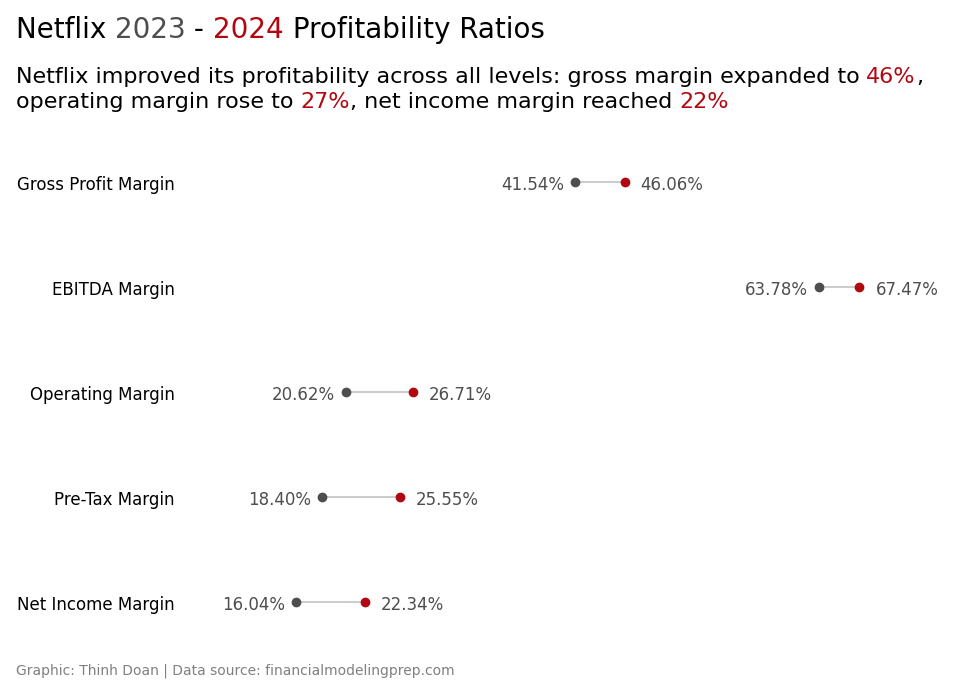

In [88]:
fig, ax = plt.subplots(figsize=(8,6))

# horizontal lines 
my_range_df = range(1,len(df_ratio_23_24_convert.index)+1)
plt.hlines(my_range_df,xmin = df_ratio_23_24_convert[2023],xmax = df_ratio_23_24_convert[2024],color = 'grey', alpha = 0.4, zorder = 1)

# points
plt.scatter(df_ratio_23_24_convert[2023],my_range_df,c= "#4f4d4d")
plt.scatter(df_ratio_23_24_convert[2024],my_range_df,c="#B20710")
# plt.yticks(my_range_df,df_ratio_23_24_convert['Metric'])

# remove axis 
ax.set_axis_off()

# add team names
n = len(df_ratio_23_24_convert)
for i in range(n):
    metric_name = df_ratio_23_24_convert['Metric'][i]
    ax_text(0.05,
            -i + 4.98,
            f'<{metric_name}>',
            ha='right',
            va='center',
            highlight_textprops=[
                {'color': 'black',
                 'weight': 'normal',
                 'size':12}
            ])

    year_2023 = df_ratio_23_24_convert[2023][i]    
    ax_text(year_2023-0.01,
            -i + 4.98,
            f'<{year_2023*100:.2f}%>',
            ha='right',
            va='center',
            highlight_textprops=[
                {'color': "#4f4d4d",
                 'weight': 'normal',
                 'size':12}
            ])
    
    year_2024 = df_ratio_23_24_convert[2024][i]    
    ax_text(year_2024+0.072,
            -i + 4.98,
            f'<{year_2024*100:.2f}%>',
            ha='right',
            va='center',
            highlight_textprops=[
                {'color': "#4f4d4d",
                 'weight': 'normal',
                 'size':12}
            ])

# title 
title_text = "Netflix <2023> - <2024> Profitability Ratios"
fig_text(
    -0.19,
    1.1,
    title_text,
    size = 20,
    ha='left', va='center',
    highlight_textprops=[
             {'color': "#4f4d4d",
                 'weight': 'normal',
                 'size':20},
            {'color': "#B20710",
                 'weight': 'normal',
                 'size':20}
    ]
)

# sub-title 
sub_text = "Netflix improved its profitability across all levels: gross margin expanded to <46%>,\noperating margin rose to <27%>, net income margin reached <22%>"
fig_text(
    -0.19,
    1,
    sub_text,
    size = 16,
    ha='left', va='center',
    highlight_textprops=[
            {'color': "#B20710",
                 'weight': 'normal',
                 'size':16},
            {'color': "#B20710",
                'weight': 'normal',
                'size':16},
            {'color': "#B20710",
                'weight': 'normal',
                'size':16}
]
)

# caption/footer
fig.text(
    x = -0.19, 
    y = 0.02,
    s = "Graphic: Thinh Doan | Data source: financialmodelingprep.com",
    ha="left", va="bottom", fontsize=10, color="grey"
)

plt.show()

In [26]:
n = len(df_ratio_23_24_convert)
for i in range(n):
    metric_name = df_ratio_23_24_convert['Metric'][i]
    print(metric_name)

Gross Profit Margin
EBITDA Margin
Operating Margin
Pre-Tax Margin
Net Income Margin


In [17]:
for metric_name in  df_ratio_23_24_convert['Metric'].unique():
    print (metric_name[0])

N
P
O
E
G


In [18]:

df_ratio_23_24_convert[2023][i]

np.float64(0.1603636204)

In [19]:
value1=np.random.uniform(size=20)
value2=value1+np.random.uniform(size=20)/4
df = pd.DataFrame({'group':list(map(chr, range(65, 85))), 'value1':value1 , 'value2':value2 })
 

In [20]:
ordered_df = df.sort_values(by='value1')
my_range=range(1,len(df.index)+1)

In [21]:
my_range

range(1, 21)

In [22]:
ordered_df

,group,value1,value2
11,L,0.004542,0.018197
8,I,0.023280,0.221346
2,C,0.048248,0.155334
12,M,0.071185,0.312259
0,A,0.081739,0.116825
15,P,0.120581,0.227539
4,E,0.194133,0.300425
14,O,0.291337,0.424055
18,S,0.296228,0.471464
7,H,0.418586,0.522608


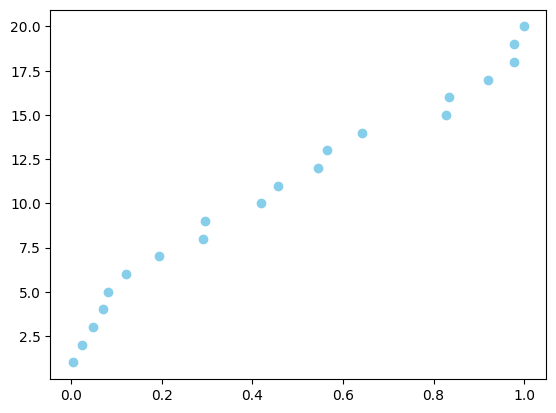

In [23]:
plt.scatter(ordered_df['value1'], my_range, color='skyblue', alpha=1, label='value1')